In [1]:
%%capture
%run ./3_clean_column_circonference.ipynb

# Distribution of trees by estate (domanialite)

Check if I have nulls in domanialite column

In [2]:
df[df.domanialite.isnull()]

,id,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
197239,2020911,NaN,PARIS 20E ARRDT,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,203006,Chimonanthe,Chimonanthus,praecox,NaN,35.0,4.0,JA,0.0,48.849547,2.41419


Search if I have non-null domanialite in the same location (lieu column)

In [3]:
df_lieu = df[df.lieu == df.loc[df.domanialite.isnull(), 'lieu'].values[0]]
df_lieu[0:1].domanialite.values[0]

'Jardin'

In [4]:
df[df.domanialite.isnull()].domanialite.values[0]

nan

We replace null value in domanialite by Jardin.

In [5]:
df.loc[df[df.domanialite.isnull()].index[0], "domanialite"] = df_lieu[0:1].domanialite.values[0]

### Trees distributions by estate (domanialite) in paris

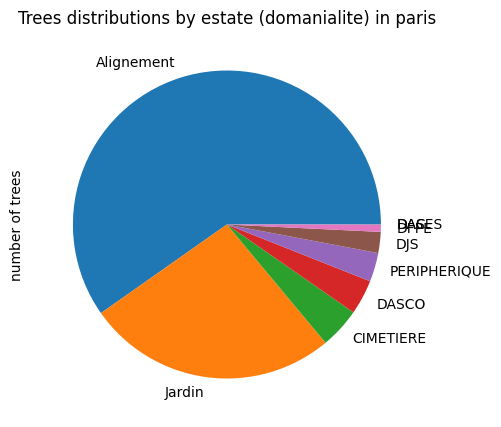

In [11]:
df_domanialite_groups = df.groupby("domanialite")['id'].count().sort_values(ascending=False)
df_domanialite_groups.plot(kind='pie', title='Trees distributions by estate (domanialite) in paris', ylabel='number of trees', figsize=(6, 5));

It can be seen that alignment and garden stand out clearly from the others

### Kind of trees most frequents in Alignement estate

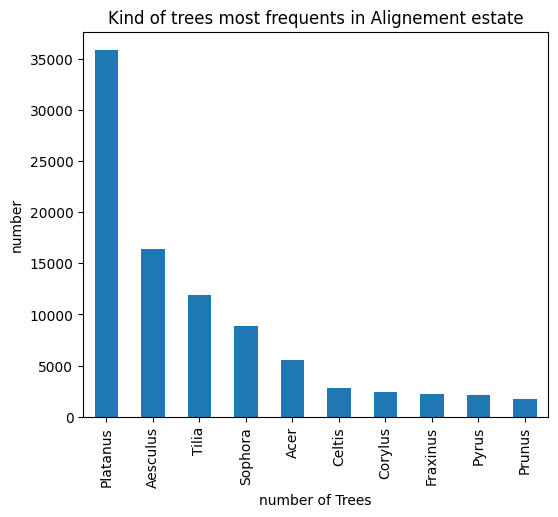

In [7]:
df_alignement = df.groupby(['genre']).apply(lambda x: x[x['domanialite'] == 'Alignement' ]['id'].count()).sort_values(ascending=False)[:10]
df_alignement.plot(kind='bar', title='Kind of trees most frequents in Alignement estate', ylabel='number',
         xlabel='number of Trees', figsize=(6, 5));

We can see that the kind of Tree the most present in Paris and more precisely in 'Alignement' is the plane tree 

### Kind of trees most frequents in Jardin estate

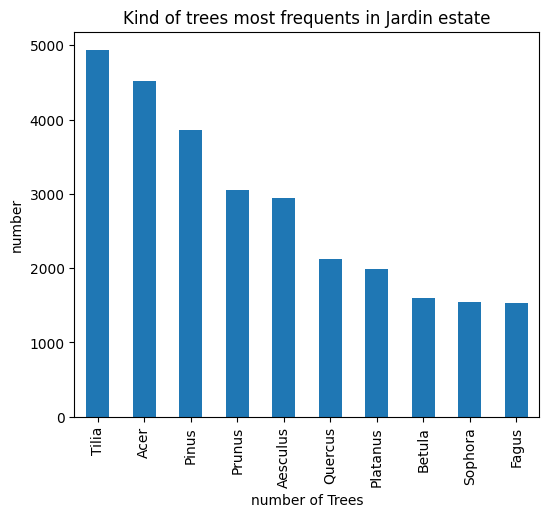

In [8]:
df_jardin = df.groupby(['genre']).apply(lambda x: x[x['domanialite'] == 'Jardin' ]['id'].count()).sort_values(ascending=False)[:10]
df_jardin.plot(kind='bar', title='Kind of trees most frequents in Jardin estate', ylabel='number',
         xlabel='number of Trees', figsize=(6, 5));

We can see that the kind of Tree the most present in Paris and more precisely in 'Jardin' is the Tilia and Acer